In [1]:
import sys

import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

sys.path.extend(["../../../"])
from src.para_voro import *
from src.general_util import *
from src.para_voro_plots import *

In [2]:
colors = make_object_array(get_12_categorical_colors())

# plot 2d single ridge with sample point and projection
aabbox = np.array([
    [-1.0, 1.0], 
    [-1.0, 1.0]
])

bandwidths = np.array([0.1, 0.1])

dim_labels = ["x1", "x2"]

samples = np.array([
    [-0.25, 0.5],
    [0.25, 0.25],
    [-0.5, -0.25],
    [0.0, -0.5]
])

v_ = 0.25

samples[1, 0] += v_
samples[3, 0] += v_

labels = np.array([0, 1, 0, 1])

[array([[0.00000000e+00, 5.55111512e-17],
        [3.33333333e-01, 1.00000000e+00]])
 array([[-3.33333333e-01, -1.00000000e+00],
        [ 5.55111512e-17,  0.00000000e+00]])]
tx1:  0.3000000000000001
tx2:  0.033333333333333326


C:\Users\bauerrn\AppData\Local\Temp\ipykernel_11308\1042064970.py:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(samples[:, 0], samples[:, 1], c=label_c, cmap='winter', s=5)


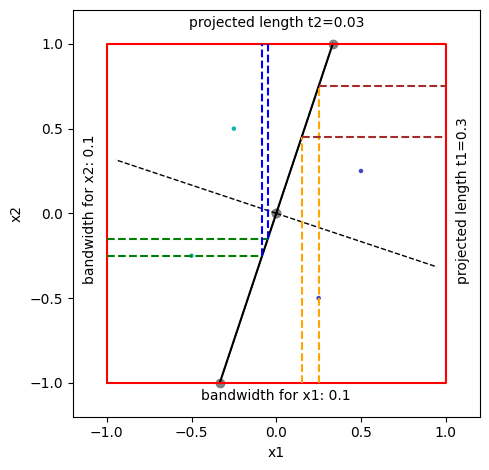

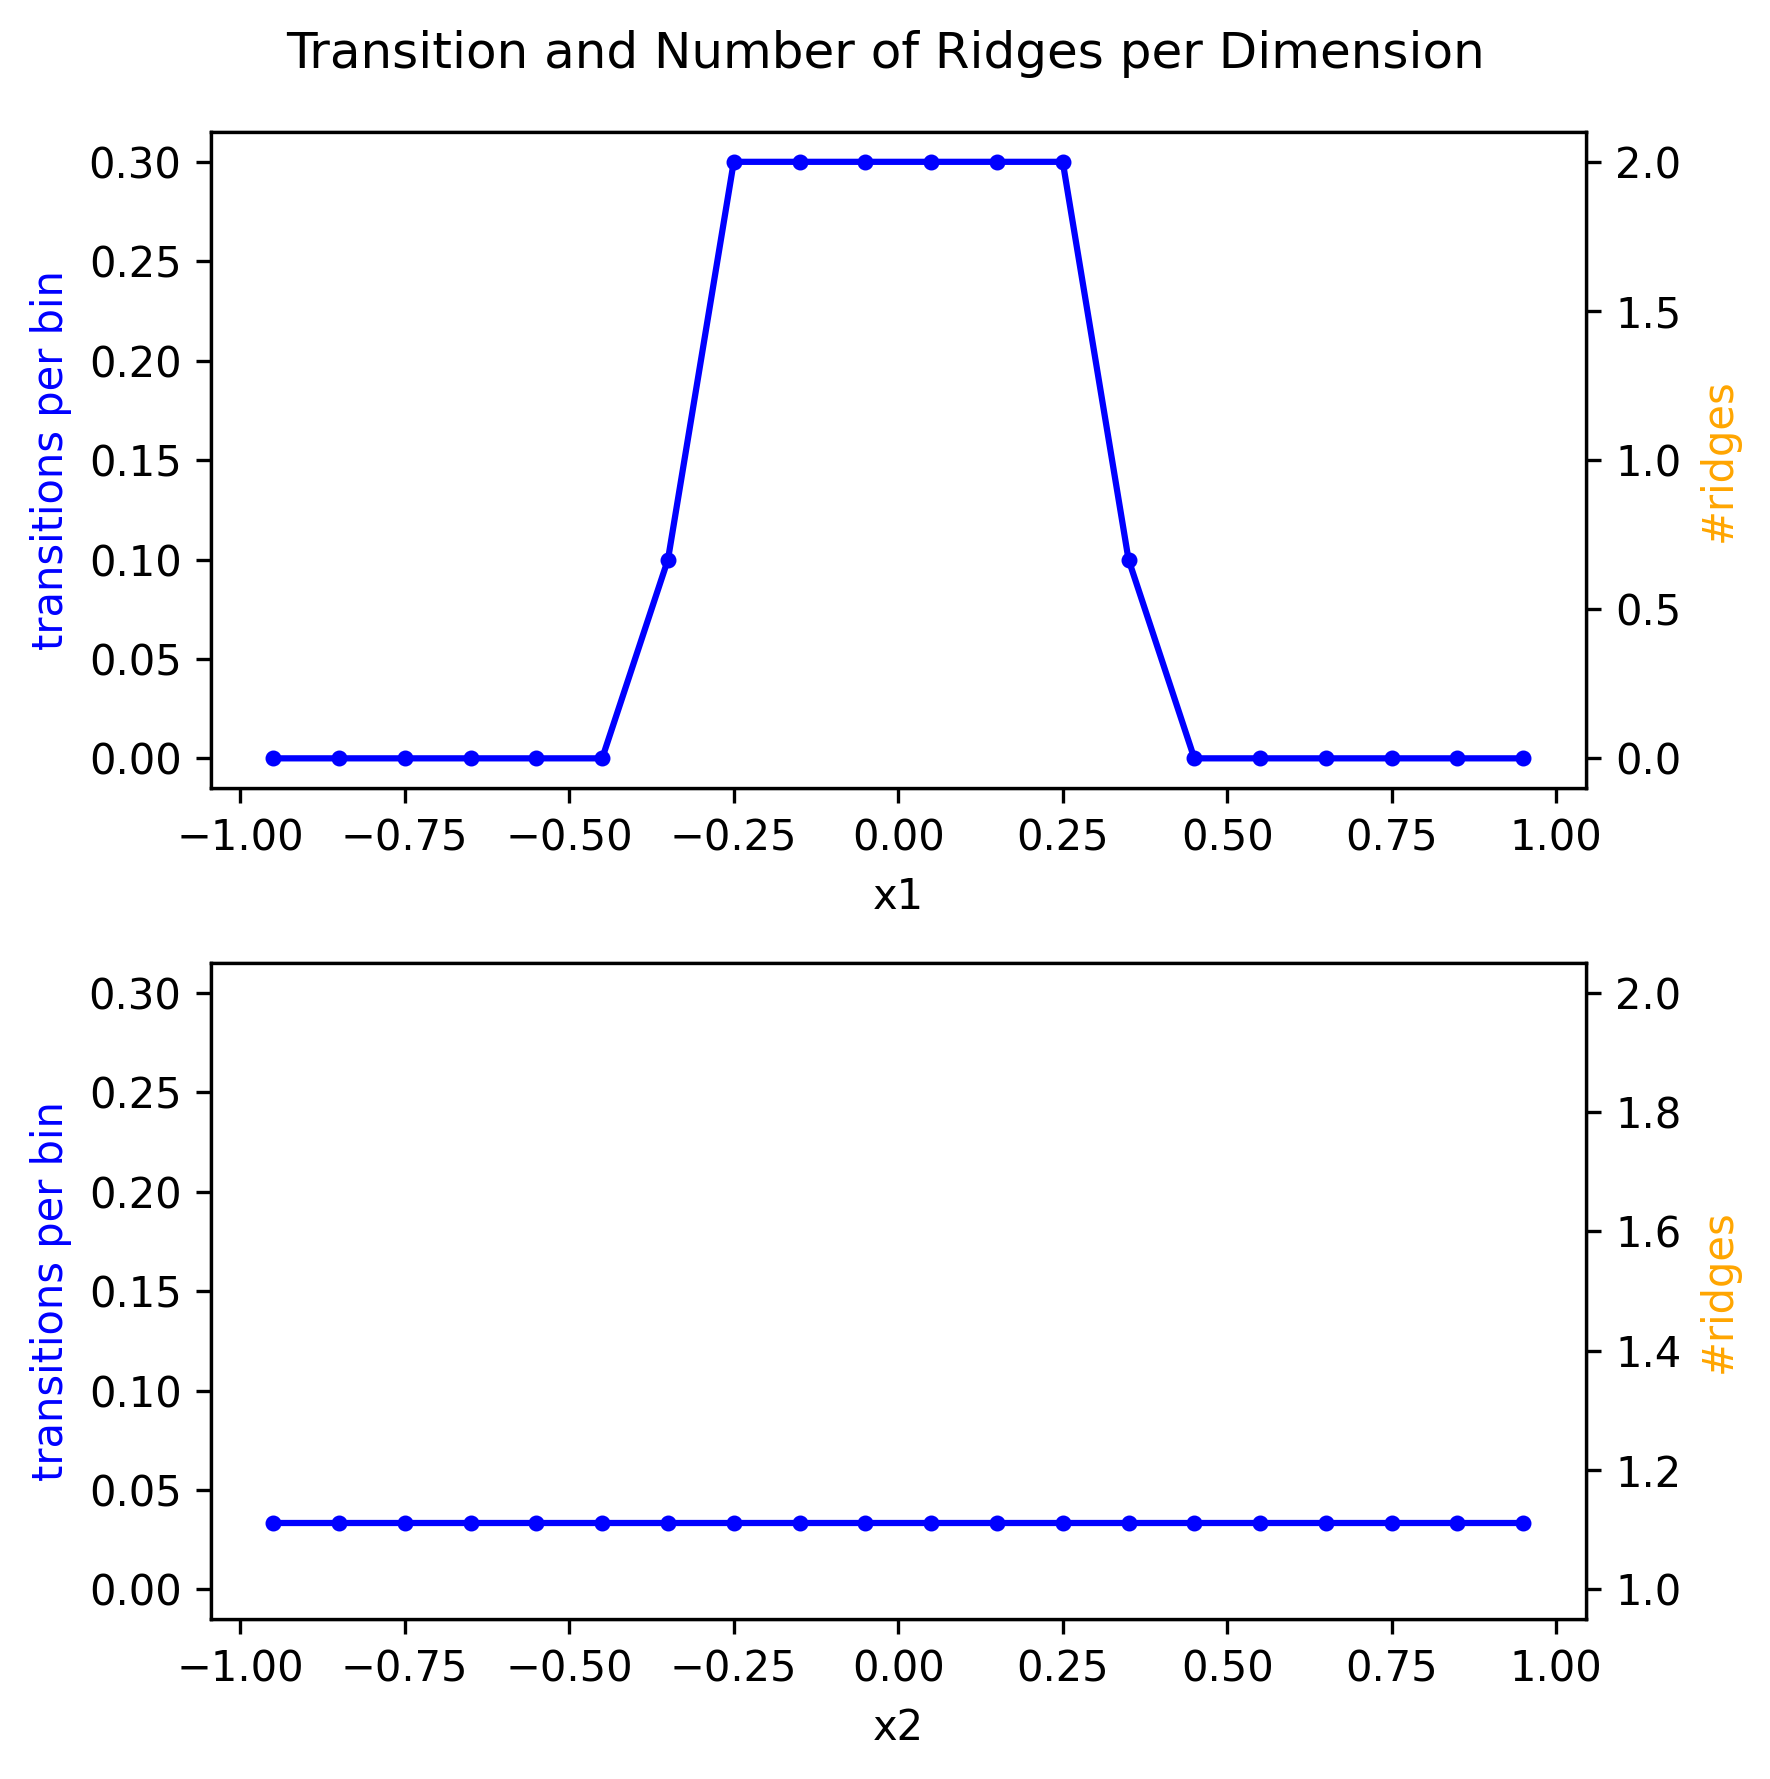

In [8]:
ridge_vertices = generate_geometric_segment_boundaries_via_voronoi(samples=samples, labels=labels, clip_bbox=aabbox, clip_convex_hull=False, return_original_ridge_point_indices=False)

print(ridge_vertices)

rv = ridge_vertices[0]
dim = 0  # x1
dy = np.abs(rv[0, 1-dim] - rv[1, 1-dim])
dx = np.abs(rv[0, dim] - rv[1, dim])

m1 = dy / dx

dim = 1
dy = np.abs(rv[0, 1-dim] - rv[1, 1-dim])
dx = np.abs(rv[0, dim] - rv[1, dim])
m2 = dy / dx

label_c = colors[np.unique(labels, return_inverse=True)[1]]

ridge_line_color = "black"
ridge_point_color = "gray"

v_sample_point_x1 = 0.2
v_sample_point_x2 = -0.2
bwh_x1, bwh_x2 = bandwidths * 0.5

plt.close()
fig = plt.figure()
ax = fig.add_subplot(111)
        
vor = Voronoi(samples)
voronoi_plot_2d(vor, show_vertices=False, show_points=labels is None, ax=ax)
ax.scatter(samples[:, 0], samples[:, 1], c=label_c, cmap='winter', s=5)

for rv in ridge_vertices:
    ax.scatter(rv[:, 0], rv[:, 1], color=ridge_point_color)
    ax.plot(rv[:, 0], rv[:, 1], color=ridge_line_color)

ax.set_xlabel(dim_labels[0])
ax.set_ylabel(dim_labels[1])

bbox_points = np.array([
    aabbox[:, 0], [aabbox[0, 0], aabbox[1, 1]], aabbox[:, 1], [aabbox[0, 1], aabbox[1, 0]]
])
bboxp = np.vstack([bbox_points, bbox_points[0]])
ax.plot(bboxp[:, 0], bboxp[:, 1], c="red")

# plot bandwidths
# x1
vmbh1 = v_sample_point_x1 - bwh_x1
vpbh1 = v_sample_point_x1 + bwh_x1

vmbh2 = v_sample_point_x2 - bwh_x2
vpbh2 = v_sample_point_x2 + bwh_x2

ax.plot([vmbh1, vmbh1], [-1.0, m1 * vmbh1], ls="--", c="orange")
ax.plot([vpbh1, vpbh1], [-1.0, m1 * vpbh1], ls="--", c="orange")
ax.annotate(f"bandwidth for x1: {bwh_x1 * 2.0}", (0.0, -1.1), ha="center")

# x1 projection
ax.plot([vmbh1, 1.0], [m1 * vmbh1, m1 * vmbh1], ls="--", c="brown")
ax.plot([vpbh1, 1.0], [m1 * vpbh1, m1 * vpbh1], ls="--", c="brown")
ax.annotate(f"projected length t1={bwh_x1 * 2.0 * m1:.1f}", (1.1, -0.4), ha="center", rotation=90)

# x2 
ax.plot([-1.0, m2 * vmbh2], [vmbh2, vmbh2], ls="--", c="green")
ax.plot([-1.0, m2 * vpbh2], [vpbh2, vpbh2], ls="--", c="green")
ax.annotate(f"bandwidth for x2: {bwh_x2 * 2.0}", (-1.1, -0.4), ha="center", rotation=90)

# x2 projection
ax.plot([m2 * vmbh2, m2 * vmbh2], [vmbh2, 1.0], ls="--", c="blue")
ax.plot([m2 * vpbh2, m2 * vpbh2], [vpbh2, 1.0], ls="--", c="blue")
ax.annotate(f"projected length t2={bwh_x2 * 2.0 * m2:.2f}", (0.0, 1.1), ha="center")

f = 0.1
offset = f * (aabbox[:, 1] - aabbox[:, 0])
offset = np.vstack([-offset, offset]).T
ax.set_xlim(aabbox[0] + offset[0])
ax.set_ylim(aabbox[1] + offset[1])

print("tx1: ", abs((m1 * -bwh_x1) - (m1 * bwh_x1)))
print("tx2: ", abs((m2 * -bwh_x2) - (m2 * bwh_x2)))

ax.set_aspect("equal")
fig.tight_layout()
# plt.title(f'One ridge evaluated at x1=0.0 and x2=0.0 with bandwidth=0.1')
plt.show()

f5_1 = fig

sample_points, sensitivities, n_ridges = ridge_based_para_sense(ridge_vertices=ridge_vertices, bandwidths=bandwidths, clip_box=aabbox, return_n_ridges=True, verbose=False)
f5 = plot_sensitivities(sample_points, sensitivities, n_ridges=n_ridges, dim_labels=dim_labels, share_y_axis=True)

In [9]:
f5_1.savefig("two_d_example.pdf")
# f5.savefig("two_d_example_sens.pdf")